# Recognizing Persian Digits

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
import random
import utils
from PIL import Image
from IPython.display import display
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
%matplotlib inline

In [2]:
root = './data/Digits/isolated digits/'
binary_save_path = './binary_data/isolated digits/'

## Contents
* Loading and Preprocessing Data

## Loading and Preprocessing Data

First we will load and normalize data, then we resize all of the images in (28,28) size and save it to binary .npy file :

In [3]:
data_paths = utils.maybe_save(root,binary_save_path)

Pickling ./binary_data/isolated digits/0.npy.
Full dataset tensor: (975, 28, 28)
Mean: 0.361884
Standard deviation: 0.215794
Pickling ./binary_data/isolated digits/1.npy.
Full dataset tensor: (942, 28, 28)
Mean: 0.367198
Standard deviation: 0.221057
Pickling ./binary_data/isolated digits/2.npy.
Full dataset tensor: (990, 28, 28)
Mean: 0.399705
Standard deviation: 0.201636
Pickling ./binary_data/isolated digits/3.npy.
Full dataset tensor: (945, 28, 28)
Mean: 0.407029
Standard deviation: 0.192823
Pickling ./binary_data/isolated digits/4.npy.
Full dataset tensor: (958, 28, 28)
Mean: 0.405774
Standard deviation: 0.192035
Pickling ./binary_data/isolated digits/5.npy.
Full dataset tensor: (994, 28, 28)
Mean: 0.383274
Standard deviation: 0.204772
Pickling ./binary_data/isolated digits/6.npy.
Full dataset tensor: (962, 28, 28)
Mean: 0.409592
Standard deviation: 0.188186
Pickling ./binary_data/isolated digits/7.npy.
Full dataset tensor: (956, 28, 28)
Mean: 0.40967
Standard deviation: 0.189994
P

Checking if data is Balanced across diffrent classes : 

In [4]:
def balancingCheck(data_folder) :
    tmpList = None
    for i,ds in enumerate(data_folder) :
        dataset = np.load(ds)
        print("number of images in %s is equal to %s" % (ds,len(dataset)))
balancingCheck(data_paths)

number of images in ./binary_data/isolated digits/0.npy is equal to 975
number of images in ./binary_data/isolated digits/1.npy is equal to 942
number of images in ./binary_data/isolated digits/2.npy is equal to 990
number of images in ./binary_data/isolated digits/3.npy is equal to 945
number of images in ./binary_data/isolated digits/4.npy is equal to 958
number of images in ./binary_data/isolated digits/5.npy is equal to 994
number of images in ./binary_data/isolated digits/6.npy is equal to 962
number of images in ./binary_data/isolated digits/7.npy is equal to 956
number of images in ./binary_data/isolated digits/8.npy is equal to 982
number of images in ./binary_data/isolated digits/9.npy is equal to 949


As you see data is almost balanced over diffrent classes.

Merging and Creating Label for datasets :

In [20]:
def merge_datasets(data_paths) :    
    data = np.concatenate([np.load(path) for path in data_paths],axis=0)
    label = np.concatenate([[path[-5]]*len(np.load(path)) for i,path in enumerate(data_paths)])
    return data,label
data,labels = merge_datasets(data_paths)

We should shuffle data for cnn trainer :

In [21]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
data,labels = merge_datasets(data_paths)

We want to make sure that data still looks good :

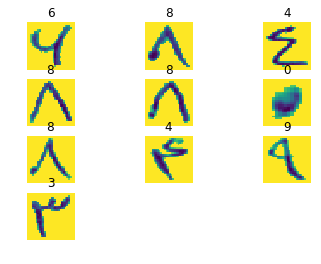

In [22]:
def visualize(dataset,labels,size = 10) :
    samples = np.random.randint(len(dataset),size=size)
    for i,sample in enumerate(samples) :
        plt.subplot(np.ceil(np.sqrt(size)),np.floor(np.sqrt(size)),1+i)
        plt.axis('off')
        plt.title(labels[sample])
        plt.imshow(dataset[sample])
visualize(data,labels,10)

In [24]:
labels[]

(9653,)